In [1]:
# !pip install pytorch

In [2]:
# !pip install torch

In [3]:
import torch

from torch import nn

import math

import matplotlib.pyplot as plt

In [4]:
# Preparing trainnig data

train_data_length = 1024

train_data = torch.zeros((train_data_length , 2))

In [5]:
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)

In [6]:
train_data[:,1] = torch.sin(train_data[:,0])

In [7]:
train_labels = torch.zeros(train_data_length)

In [8]:
train_set = [(train_data[i], train_labels[i])
                for i in range(train_data_length)]

In [9]:
train_set

[(tensor([0.7701, 0.6962]), tensor(0.)),
 (tensor([0.7429, 0.6764]), tensor(0.)),
 (tensor([0.4981, 0.4778]), tensor(0.)),
 (tensor([ 3.6357, -0.4742]), tensor(0.)),
 (tensor([2.9821, 0.1588]), tensor(0.)),
 (tensor([0.2609, 0.2580]), tensor(0.)),
 (tensor([3.0138, 0.1274]), tensor(0.)),
 (tensor([2.6147, 0.5028]), tensor(0.)),
 (tensor([ 4.5600, -0.9884]), tensor(0.)),
 (tensor([2.6350, 0.4852]), tensor(0.)),
 (tensor([ 4.7264, -0.9999]), tensor(0.)),
 (tensor([0.7989, 0.7166]), tensor(0.)),
 (tensor([ 4.0005, -0.7571]), tensor(0.)),
 (tensor([ 3.5371, -0.3853]), tensor(0.)),
 (tensor([ 5.4851, -0.7160]), tensor(0.)),
 (tensor([1.7715, 0.9799]), tensor(0.)),
 (tensor([ 5.6247, -0.6119]), tensor(0.)),
 (tensor([ 3.6927, -0.5236]), tensor(0.)),
 (tensor([2.8522, 0.2853]), tensor(0.)),
 (tensor([1.1272, 0.9032]), tensor(0.)),
 (tensor([0.6138, 0.5759]), tensor(0.)),
 (tensor([1.1689, 0.9203]), tensor(0.)),
 (tensor([0.8301, 0.7380]), tensor(0.)),
 (tensor([1.6350, 0.9979]), tensor(0.)),


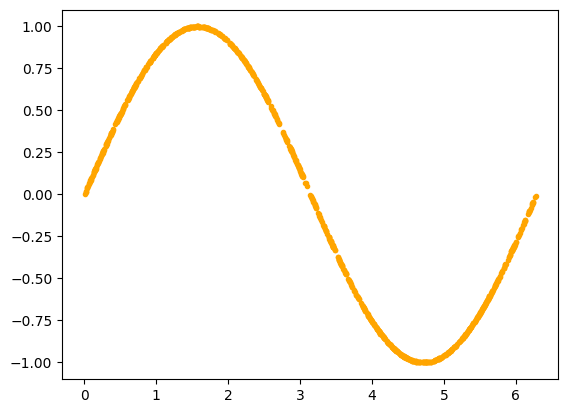

In [10]:
# Visualising the Dataset

plt.plot(train_data[:,0], train_data[:, 1], ".", c='orange')

In [11]:
# creating data loader for batch_wise training

batch_size = 32

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)

In [12]:
train_loader

In [13]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(2, 256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64, 1),
        nn.Sigmoid(),
    )

    # Sequential

  def forward(self, x):
    output = self.model(x)

    return output

In [14]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,2),
    )

  def forward(self, x):
    output = self.model(x)

    return output

In [15]:
# creating objects for both classes

discriminator = Discriminator()

generator = Generator()

In [16]:
# setting parameters for training

lr = 0.001

num_epochs = 300

loss_function = nn.BCELoss()

In [17]:
# setting optimizers

optimizer_d = torch.optim.Adam(discriminator.parameters(), lr = lr)

optimizer_g = torch.optim.Adam(generator.parameters(), lr = lr)

In [18]:
# Training GAN

# for epoch in range(num_epochs):
#   for n, (real_samples, _) in enumerate(train_loader):
#     real_samples_labels = torch.ones((batch_size, 1))

#     latent_space_sample =torch.randn((batch_size, 2))

#     generated_samples = generator(latent_space_sample)

#     generated_samples_labels = torch.zeros((batch_size, 1))

#     all_samples = torch.cat((real_samples, generated_samples))

#     all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

#     # Training Discriminator

#     discriminator.zero_grad()

#     output_discriminator = discriminator(all_samples)

#     loss_discriminator = loss_function(
#         output_discriminator, all_samples_labels
#     )

#     loss_discriminator.backward()

#     optimizer_d.step()

#     # Generate random noise for training generator

#     latent_space_samples = torch.rand((batch_size, 2))

#     # training generator

#     generator.zero_grad()

#     generated_samples = generator(latent_space_samples)

#     output_discriminator_generated = discriminator(generated_samples)

#     loss_generator = loss_function(output_discriminator_generated, real_samples_labels)

#     loss_generator.backward()

#     optimizer_g.step()

In [19]:
# Training GAN

for epoch in range(num_epochs):
  for n, (real_samples,_) in enumerate(train_loader):
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, 2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

# Training discriminator

    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_d.step()

# generator random noise for training generator

    latent_space_samples = torch.randn((batch_size, 2))

# Training generator

    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated,real_samples_labels)
    loss_generator.backward()
    optimizer_g.step()


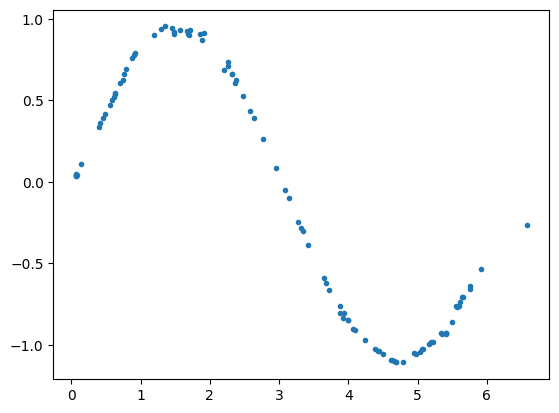

In [20]:
# generating fake data and Visualising

latent_space_samples = torch.randn(100, 2)

generated_samples = generator(latent_space_samples)

generated_samples = generated_samples.detach()

plt.plot(generated_samples[:,0],
         generated_samples[:,1], ".")